In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from multinomial_kernel import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [3]:
raw_train_data = "../../data/train.csv"
raw_test_data = "../../data/test.csv"

In [4]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.25, #shuffle=False #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)
X_normalized = preproc.normalize_data(train_data[:,:-1])

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')


In [5]:
X_train.shape

(33570, 10)

# Train

In [6]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=2000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7355654754742053
Epoch 200, cross entropy loss: 0.7063938053460103
Epoch 300, cross entropy loss: 0.6942502399316988
Epoch 400, cross entropy loss: 0.6865818190377301
Epoch 500, cross entropy loss: 0.6810817010164208
Epoch 600, cross entropy loss: 0.6768147942622325
Epoch 700, cross entropy loss: 0.673309711563747
Epoch 800, cross entropy loss: 0.6703247237157237
Epoch 900, cross entropy loss: 0.6677303950102951
Epoch 1000, cross entropy loss: 0.6654504455285082
Epoch 1100, cross entropy loss: 0.6634343650781361
Epoch 1200, cross entropy loss: 0.6616451895157559
Epoch 1300, cross entropy loss: 0.6600539386028864
Epoch 1400, cross entropy loss: 0.6586369020159414
Epoch 1500, cross entropy loss: 0.6573741696995484
Epoch 1600, cross entropy loss: 0.656248742340914
Epoch 1700, cross entropy loss: 0.6552459394789576
Epoch 1800, cross entropy loss: 0.6543529771403739
Epoch 1900, cross entropy loss: 0.65355865137

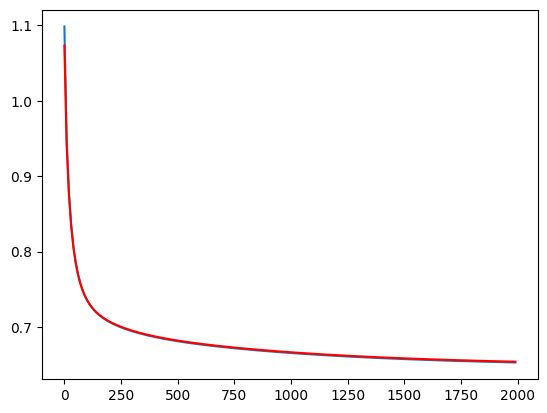

In [7]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

---

Trying to add more columns to the best model

In [9]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500', "UBOT",
        "Label"] 

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'Label'],
      dtype='object')


In [13]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7351263558850039
Epoch 200, cross entropy loss: 0.6886336795186007
Epoch 300, cross entropy loss: 0.6733528922188606
Epoch 400, cross entropy loss: 0.6655558201934964
Epoch 500, cross entropy loss: 0.6605410418355145
Epoch 600, cross entropy loss: 0.656880299413959
Epoch 700, cross entropy loss: 0.6540069853220013
Epoch 800, cross entropy loss: 0.6516503357928456
Epoch 900, cross entropy loss: 0.6496621133077801
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'Label'],
      dtype='object')
Confusion Matrix:
[[10400   191  1038]
 [  344   229     5]
 [ 1164    15  1385]] 

Accuracy:
0.8134 

Precision:
0.6567 

Recall:
0.6102 

F1 Score:
0.6326


--- 

In [7]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')


In [11]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7321367608559549
Epoch 200, cross entropy loss: 0.7025375952097122
Epoch 300, cross entropy loss: 0.6901944412188235
Epoch 400, cross entropy loss: 0.6823958055239414
Epoch 500, cross entropy loss: 0.6768100367932977
Epoch 600, cross entropy loss: 0.6724842026230518
Epoch 700, cross entropy loss: 0.6689317377061312
Epoch 800, cross entropy loss: 0.6659021679045767
Epoch 900, cross entropy loss: 0.663262203066028
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10302   217  1110]
 [  341   230     7]
 [ 1123     9  1432]] 

Accuracy:
0.81 

Precision:
0.6472 

Recall:
0.6141 

F1 Score:
0.6302


In [13]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7604864365664811
Epoch 200, cross entropy loss: 0.7449606033332898
Epoch 300, cross entropy loss: 0.7408726757678747
Epoch 400, cross entropy loss: 0.7398550647397804
Epoch 500, cross entropy loss: 0.7407586767168708
Epoch 600, cross entropy loss: 0.7429022158740011
Epoch 700, cross entropy loss: 0.7458515636114263
Epoch 800, cross entropy loss: 0.7493591294289564
Epoch 900, cross entropy loss: 0.7532825662289293
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10302   217  1110]
 [  341   230     7]
 [ 1123     9  1432]] 

Accuracy:
0.81 

Precision:
0.6472 

Recall:
0.6141 

F1 Score:
0.6302


---

In [14]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_test_data)

test_df, test_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"], is_test=True)

test_data = test_df[['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500']].to_numpy()

test_data = preproc.normalize_data(test_data)

In [15]:
test_data.shape

(10320, 11)

In [16]:
y_pred_test = model.predict(X=test_data)

In [17]:
submition = raw_data['SNo'].reset_index().copy()
submition['Label'] = pd.Series(y_pred_test)
submition.drop("index", axis=1, inplace=True)
submition.to_csv(f"predictions_{datetime.now()}_opt_multinomial_more_training_plus_ubot.csv", index=False)